<a href="https://colab.research.google.com/github/sai-teja-ponugoti/Self_Organizing_Maps/blob/master/self_oraganizing_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kohonen self organizing map (SOM)**

In [ ]:
# importing required libraries
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

##### **Preparing Dataset**

In the below cell we prepare the train data to feed to SOM. We have choosen 24 colours such that the training input of the SOM are 24 colors by using shades of red, green, blue, with some
yellow, teal and pink.

The cell following is used to display a color bar for the selected colors.

In [ ]:
train_data= [
    # red 
    [226,142,142],[222,99,71],[239,135,173],[222,115,9],[241,246,100],[215,105,80],[255,183,168],[202,186,38],
    # Green
    [0,215,0],[80,220,141],[188,220,80],[0,200,156],[46,205,72],[66,205,200],[168,205,46],[170,229,57],
    # Blue
    [169,169,255],[153,204,255],[53,255,255],[180,62,216],[154,117,210],[177,129,192],[80,168,205],[107,216,223]
    ]

train_data = np.array(train_data)
train_data = train_data/255

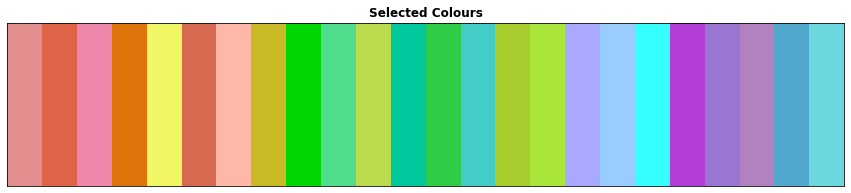

In [ ]:
# plotting selected colurs as a bar
scaled_colours = train_data
fig, ax = plt.subplots(figsize=(15, 3))

plt.title("Selected Colours",fontweight="bold")
ax.axis(xmin=0, xmax=len(scaled_colours))
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

for index, colour in enumerate(scaled_colours):
    ax.axvspan(index, index + 1, color=colour)

##### **Helper function to plot heat map using Matplotlib**

In [ ]:
# function to plot heat map
def plot_heatmap(map,title_string = "default"):
    plt.figure(figsize=(5,5))
    # plt.imshow(map, cmap='hot', interpolation='nearest')
    plt.imshow(map)
    plt.title(title_string,fontweight="bold")
    plt.show()

##### **Random intialization of Map weights**



*   At first we create a map of required dimensions using the length, breadth of the 2D map required along with the number of features as the third dimension. 
*   The 3D numpy array is intialised randomly using np.random.rand() so that the values are between 0 and 1.
*   We will also plot the randomly intialised map, so that the learning on it can be observed at further stages.

In [ ]:
# function to create and intialize weights matrix randomly 
def create_initialize_weight_matrix(map_length,map_width,train_d,title_string = "default"):

    map = np.array(np.random.rand(map_length,map_width,train_d))
    plot_heatmap(map, title_string)
    
    return map

In [ ]:
# testing create_initialize_weight_matrix and heat map functions
# map = create_initialize_weight_matrix(100,100,3,"Randomly intialized SOM weights")

##### **Neighbourhood  based update matrix hij**



*   At first we build a matrix which holds the distance between every combination of indices in a matrix hij_distance_matrix. As this is always same we caluclate this at the begining of model setup. For a specific index i,j:

\begin{equation}
hij_-distance_-matrix[i][j] = np.linalg.norm(indexes_-matrix[i][j]- indexes_-matrix,axis=2)^2
\end{equation}

*   Then we use above hij_-distance_-matrix hij_-matrix using the epoch based sigma i.e. σ(k).

\begin{equation}
hij_-matrix = e^({\frac{-hij_-distance_-matrix}{2*σ^2(k)}})
\end{equation}

Later when a winning neuron index is found, the hij needed to update the weights can be easily extracted from the built hij_matrix. Here hij = Nij(mentioned in assignment pdf).


In [ ]:
def create_hij_distance_matrix(map_length,map_width):
    
    indexes_matrix = np.zeros((map_length,map_width,2))
    hij_matrix_distances = np.zeros((map_length,map_width,map_width,map_width))
    for i in range(map_length):
        for j in range(map_width):
            indexes_matrix[i][j] = [i,j]

    # print(indexes_matrix.shape)
    # print(indexes_matrix[::])

    for i in range(map_length):
        for j in range(map_width):
            hij_matrix_distances[i][j] = np.linalg.norm(indexes_matrix[i][j]- indexes_matrix,axis=2)**2

    # print(hij_matrix_distances.shape)
    return hij_matrix_distances


In [ ]:
def create_hij_matrix(hij_matrix_distances,sigma =1):

    hij_matrix = np.exp(-(hij_matrix_distances)/(2*(sigma**2)))

    # print(hij_matrix.shape)
    return hij_matrix

In [ ]:
# testing create_hij_matrix
# hij_matrix = create_hij_matrix(create_hij_distance_matrix(100,100),1)
# %time
# dum = create_hij_distance_matrix(100,100)

##### **Varying learning rate(alpha) and sigma with epoch number:**


* k = current epoch number
* T = total number of epochs


* new epoch based learning rate α(k): 

\begin{equation}
α(k) = α(0)e^({\frac{-k}{T}})
\end{equation}

* new epoch based sigma σ(k): 

\begin{equation}
σ(k) = σ(0)e^({\frac{-k}{T}})
\end{equation}

The helper function is as shown below.

In [ ]:
def varying_prameters_epoch(alpha,sigma, epoch_number = 1, total_epochs = 1000):
    return alpha*np.exp(-epoch_number/total_epochs),sigma*np.exp(-epoch_number/total_epochs)

In [ ]:
# test varying_learning_rate
# print(varying_learning_rate(0.8,900,1000))

##### **Extracting the winning node indices based on the distance metric:**



*   To extract the winning node, we find distance between input vector and all the map vectors.
*   FInd the mminimum value and hence its index/co-ordinates.

\begin{equation}
distances = np.linalg.norm(x-map,axis=2)  
\end{equation}

\begin{equation}
result = np.where(distances == np.amin(distances))  
\end{equation}



In [ ]:
# function to find best node
def find_best_matching_node(x,map):
    # print(" find_best_matching_node ")
    # print("x_shape",x.shape)
    # print("map_shape",map.shape)
    distances = np.linalg.norm(x-map,axis=2)
    # print(distances.shape)
    # amin = np.amin(distances)
    # print(amin)
    result = np.where(distances == np.amin(distances))    

    return result[0][0],result[1][0]

In [ ]:
# testing find_best_matching_node
# length, width = find_best_matching_node(np.array([0.5,0.5,0.5]),map)
# print(length,width)
# print(map[length,width,:])

In [ ]:
# function to extract hij_matrix for the best winning node
def extract_hij_best_node(hij_matrix,length_id,breadth_id):
    # hij = hij_matrix[length_id,breadth_id]
    # print(hij.shape)
    # print(hij[34][58])
    return hij_matrix[length_id,breadth_id]

In [ ]:
# test extract_hij_best_node
# extract_hij_best_node(hij_matrix,34,58)

##### **Map weights updation:**



*   The below function is used to update the SOM weights based on best winner node and varying neighbourhood updation rates based on the distance from winning node.
*   At firs we convert hij(Nij) matrix to a 3D array.
*   Then multiply the resized hij element wise with (x-map)using np.multiply().The reshaping of hij helped in using python broadcasting for multiplication , rather than using for loops which are costly.
* The weights are upadted based on below formula, where x is a single input sample:

\begin{equation}
map = map + α(k)*hij*(x-map)
\end{equation}



In [ ]:
# function to update weights
def update_weights(map,hij,alpha,x):

    # broadcasting hij_mtrix 

    hij = np.reshape(hij ,hij.shape + (1,))

    map += alpha*np.multiply(hij,(x-map))
    # print(map.shape)
    return map

##### **Function to facilitate training of SOM:**



*   At first we randomly intialize the map using create_initialize_weight_matrix function. 
*   As the next step we intialize the hij_distance matrix using the function create_hij_distance. This is created once.
*   The we loop for each epoch.For every epoch we find modified alpha,sigma and hij_matrix using functions varying_parameters_epoch and create_hij_matrix.
*   After finding epoch specific parametres, then we loop through each input sample(24 samples) one at a time and find the best winning node,hence we get the winning nodes map co-ordinates.
*   Use the co-ordinated extacted to extract the distance matrix hij_best_matching node, which has its distances from all other points in the map.
*   Update the map weight using alpha,extracted hij and difference of input and map using the function update_weights.
*   As intermediate results we print the heat map at epochs 20,40,100 and 1000.
*   A loop is written to go through different sigma values (1,10,30,50,70).

In [ ]:
# function to train/ fit the SOM map
def train(X,epochs=1000,alpha = 0.8,sigma = 1,map_length = 100, map_width = 100):

    num_features = X.shape[1]

    # randomly intialising map weights
    map = create_initialize_weight_matrix(map_length,map_width,num_features,
                                          title_string = str("randomly intialised map for sigma ="+str(sigma)))
    hij_distance_matrix = create_hij_distance_matrix(map_length,map_width)
    # print(hij_distance_matrix[0][0][99][99])

    for epoc in range(1,epochs+1):
        # caluclating epoch specific learning_Rate and sigma
        alpha_epoch, sigma_epoch = varying_prameters_epoch(alpha,sigma, epoch_number = epoc,
                                                           total_epochs = epochs)

        # calucalting sigma_epoch specific distances matrix
        hij_matrix = create_hij_matrix(hij_distance_matrix,sigma_epoch)
        # print(hij_matrix[0][0][0][0])

        # loop to go through each training sample and uppdate weights based on best matching node
        for i in range(len(X)):
            best_length,best_width = find_best_matching_node(X[i],map)
            # extract hij for best matching node
            hij_best_matching_node = extract_hij_best_node(hij_matrix,best_length,best_width)

            # update map weights based on epoch number and hij matrix for the best node
            map = update_weights(map,hij_best_matching_node,alpha_epoch,X[i])

        if epoc in [20, 40, 100, 1000]:
            # print(map)
            plot_heatmap(map,title_string = "Sigma = "+str(sigma) + "  SOM at epoch : "+ str(epoc))

        if epoc % 100 == 0:
            print("finished epoch ",epoc)

##### ***Use below cell to run using a specific sigma values.***

example : sigma = 10, sigma = 70 ....

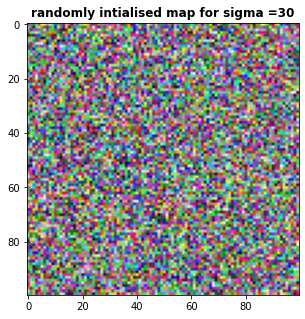

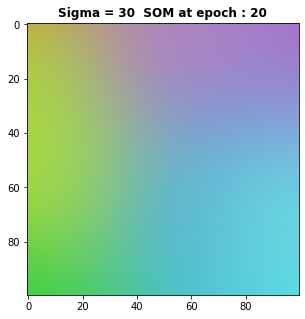

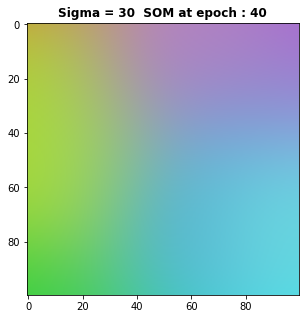

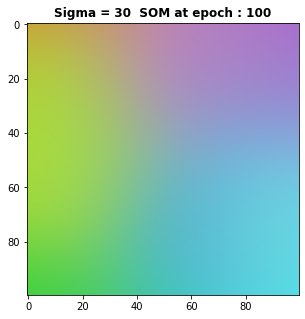

finished epoch  100
finished epoch  200
finished epoch  300
finished epoch  400
finished epoch  500
finished epoch  600
finished epoch  700
finished epoch  800
finished epoch  900


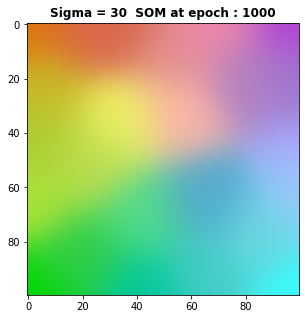

finished epoch  1000


In [ ]:
# use this cell to run with specific sigma value 
train(train_data,alpha=0.8,sigma=30,epochs=1000)

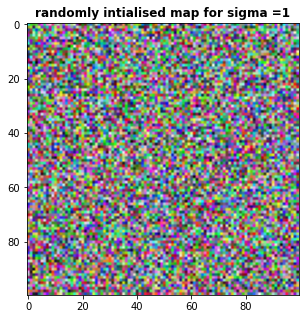

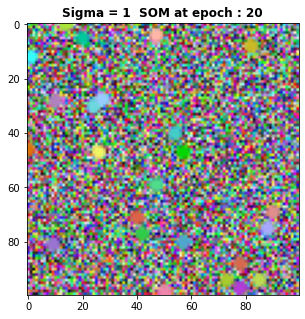

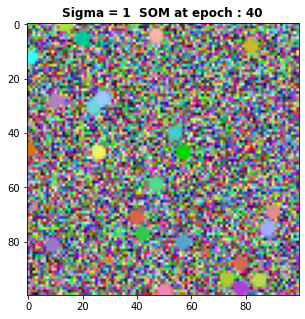

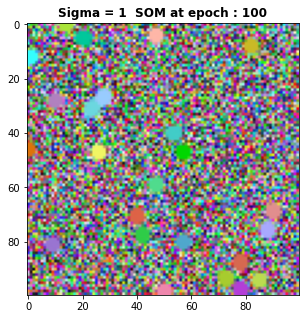

finished epoch  100
finished epoch  200
finished epoch  300
finished epoch  400
finished epoch  500
finished epoch  600
finished epoch  700
finished epoch  800
finished epoch  900


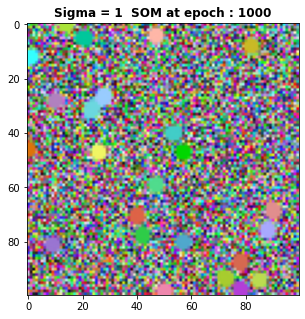

finished epoch  1000
finished sigma =  1





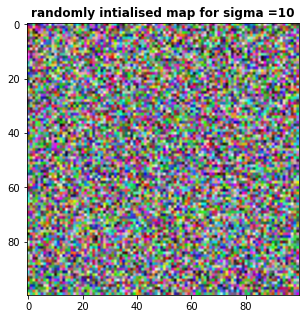

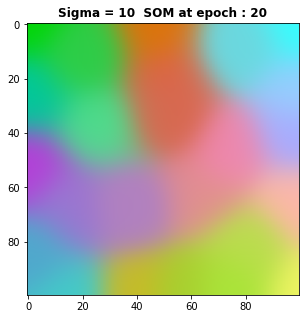

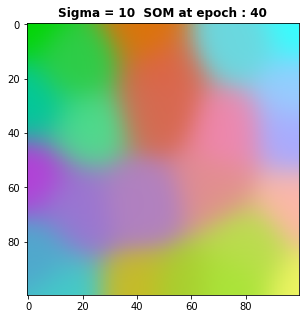

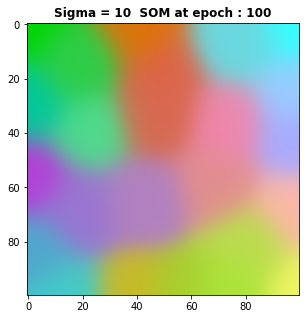

finished epoch  100
finished epoch  200
finished epoch  300
finished epoch  400
finished epoch  500
finished epoch  600
finished epoch  700
finished epoch  800
finished epoch  900


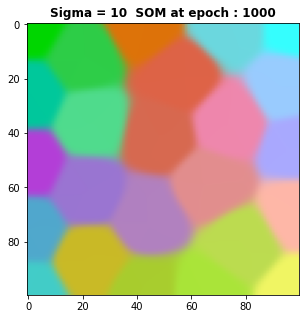

finished epoch  1000
finished sigma =  10





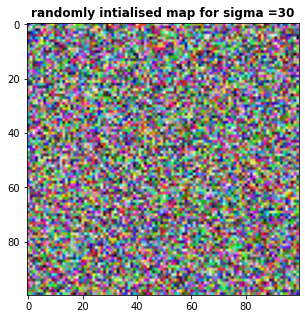

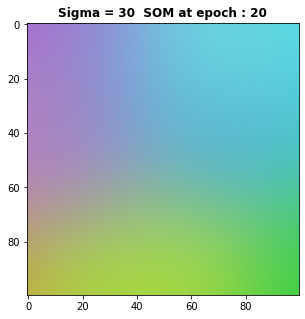

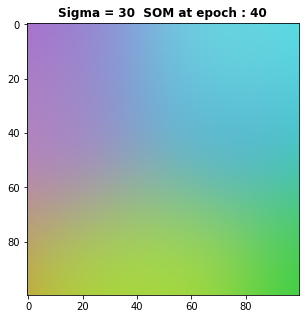

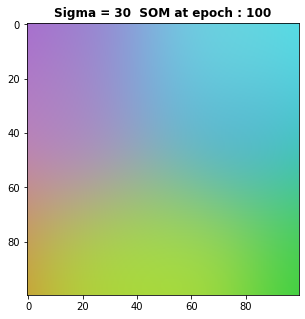

finished epoch  100
finished epoch  200
finished epoch  300
finished epoch  400
finished epoch  500
finished epoch  600
finished epoch  700
finished epoch  800
finished epoch  900


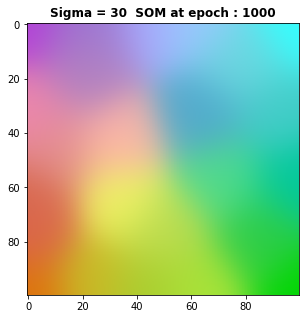

finished epoch  1000
finished sigma =  30





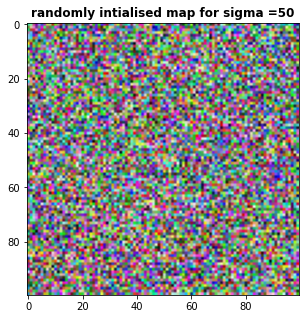

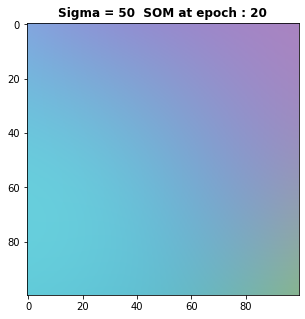

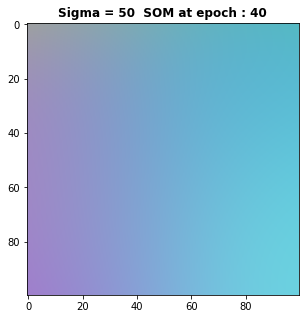

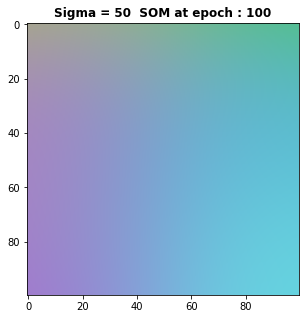

finished epoch  100
finished epoch  200
finished epoch  300
finished epoch  400
finished epoch  500
finished epoch  600
finished epoch  700
finished epoch  800
finished epoch  900


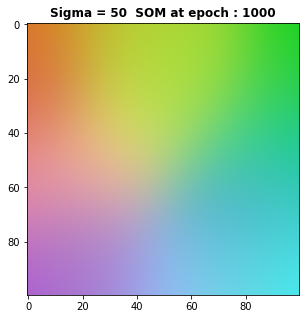

finished epoch  1000
finished sigma =  50





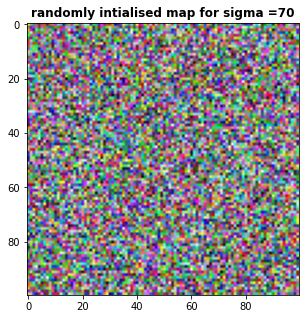

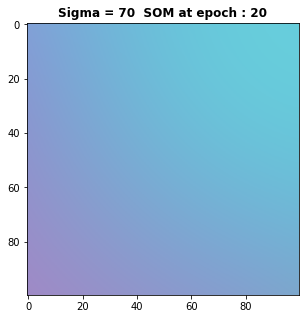

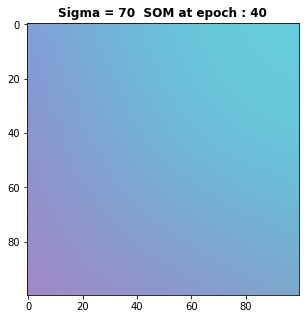

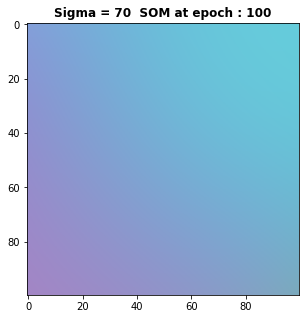

finished epoch  100
finished epoch  200
finished epoch  300
finished epoch  400
finished epoch  500
finished epoch  600
finished epoch  700
finished epoch  800
finished epoch  900


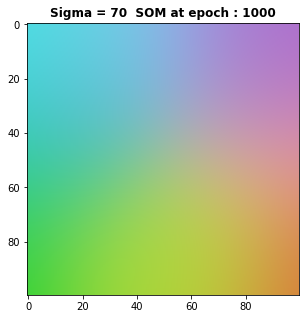

finished epoch  1000
finished sigma =  70





In [ ]:
# testing train 
# for s in [1, 10, 30, 50, 70]:
#     train(train_data,sigma=s,epochs=1000)
#     print("finished sigma = ",s)

##### **Plotting variations in alpha and sigma**

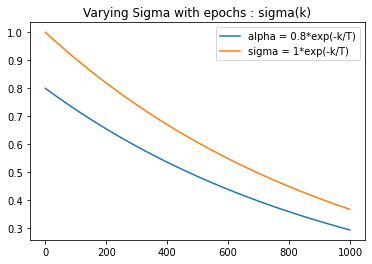

In [ ]:
def graph(func, x_range, title_string, label_string):
   x = np.arange(*x_range)
   y = func(x)
   plt.plot(x, y, label = label_string)
   plt.title(title_string)
   plt.legend()

# graph to show varying alpha with epoch number
graph(lambda x: 0.8*(np.exp(-x/1000)), (0,1000),"Varying Learning Rate with epochs : alpha(k)", 
      "alpha = 0.8*exp(-k/T)")

# graph to show varying sigma with epoch number , Example sigma = 1
graph(lambda x: 1*(np.exp(-x/1000)), (0,1000),"Varying Sigma with epochs : sigma(k)",
      "sigma = 1*exp(-k/T)")

### **Results:**

**Randomly intialized weights:** 

![alt text](https://drive.google.com/uc?export=view&id=10iT5sTYHQoYW_RH_YC0erz9GKHYbA4k2)





##### **SOM with Sigma = 1**

![alt text](https://drive.google.com/uc?export=view&id=1RIjjTP9GDPn1n4SSdK8aHm3mY7V5Ewjv)


##### **SOM with Sigma = 10**

![alt text](https://drive.google.com/uc?export=view&id=1qgObWZRYKPTg-55UygnnmsH1FkhGvCyE)


##### **SOM with Sigma = 30**

![alt text](https://drive.google.com/uc?export=view&id=1X78N0mzLDfvtkWwUDehrfKd9QX6XqR18)




##### **SOM with Sigma = 50**

![alt text](https://drive.google.com/uc?export=view&id=1EKfPN_RtgavWElj0WnDxZQJwRPRCFn3z)



##### **SOM with Sigma = 70**

![alt text](https://drive.google.com/uc?export=view&id=1BfY4d_dBGPpkB8J1Fxss_Hm87rYc3q2S)


## **Points Observed:**

We will discuss the effect of epochs and variation of sigma parameter using two graphs as shown below.

![alt text](https://drive.google.com/uc?export=view&id=1xyA2rTXogo8rWW9hPSuDIvNaFJNih6GP)![alt text](https://drive.google.com/uc?export=view&id=1lOTJ9vqjZtExdDSbKXOLC2YGK_CJ7H5L)



**Effect of variations in Sigma:** 



*   From the normal distribution graph we can observe that as the spread parameter Sigma decrease, the width of the distribution decreases and vice versa.
*   In SOM this distribution is used to decide the amount by which neighbours of winning node has to be updated. So for the neighbours near to the winning node, the factor by which they get updated is greter than the farther ones.
*   So if sigma is very less, only very few nearest neighbours get their weights updated based on the input, so there will be many small clusters formed in the graph for each input type or color.
*   We can observe from the above graphs of sigma = 1, the weights update doesn't reach many neighbour neurons, so very small clusters are formed in the map, for every input provided.
*   We can notice that when the sigma increase(sigma = 10,30,50,70), the cluster size increase and the inputs tend to get mixed over the cluster ends and form a uniform colour mapping instead of separte clusters. 
*   This happens because, the effect of input is on a larger area of winning neurons neighbours i.e. each input will tend to update weights of many neurons.
*   Hence as the sigma increase we observe more smooth graphs, but after a certain point with very huge sigma, only some inputs tend to dominate others.


**Effect of variations in epoch:**
*   As the epoch number increases, the learning rate and sigma decreases exponentially. 
*   As a result with the amount of learning rate deacy, the factor of weights update get lesser and lesser. So intially neurons tend to correct their weights with huge values to reach the value of input. But as they tend to come closer to the inputs, we should not overshoot the weights again by updating with higher values. So with number of epochs the learning factor decreases eponentially and makes SOM weights reach more closer to inputs.
*   We can notice that in the initial epochs the map updates its weights pretty quickly, but after certain number of epochs, the difference cannot be even identified easily.
*   Another thing to notice with epochs is , as epochs number increase sigma decrease, so only very nearest neighbours gets their weights updated with good factor.
*   So as we go through more and more epochs, we will again notice the formation of clusters with vague boundaries i.e. there will dominant regions in the graph and the graphs looses its smotheness. We can observe this from the  graphs of sigma = 50. At 100 epochs the graph is smooth with no dominant colors, whereas at 1000 epochs we can observe slight dominant colors with a noticable boundaries.